In [36]:
!pwd

/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks


This is second notebook that I intend to carry stuff related to plotting using matplotlib. The first notebook is http://localhost:8888/notebooks/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/Python%20Plotting%20-%20matplotlib%2C%20(numpy%20too)%20etc.ipynb#PassingPlotsToFunctionsEtc

#### My words on 'figure' and the initially confusing concept of 'axes' in matplotlib.

My understanding so far (5/22/21) is that the **figure** object in matplotlib is like the TCanvas object in ROOT. And, 'axes' are like TPads (pads) in ROOT. A TCanvas or 'figure' is like a Frame that can have multiple photos or paintings in our real life situation. A (T)pad or an Axes (not 'axis') is like a real-life canvas or piece of paper on which we can have a painting done or a photo/graphics printed. The confusing 'Axes' could be thought of as a 2D region/space in the TCanvas or figure which is defined by (an x-axis and an y-axis). Now it makes sense when we say we want to add an "axes" to the figure, because that means we would add a drawing/painting space with an x-axis and an y-axis so we could draw a graphics object such as a photo, histogram, graph etc. Although, literally, 'axes' is a plural noun, we treat such a space defined by two axes as a singular noun 'axes' (which is the region why it is so confusing for beginners like me).

<a id='GoTop'></a>
## Contents
* [Plot_Organization_in_matplotlib](#Plot_Organization_in_matplotlib)
* [Creating custom plotting functions with matplotlib](#Creating_custom_plotting_functions_with_matplotlib)


[GoTop](#GoTop) <a id='Plot_Organization_in_matplotlib'></a>
### [Plot Organization in matplotlib — Your One-stop Guide](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801)
Matias Calderini Oct 27, 2019·9 min read

If you are reading this, it is probably because you agree with me that most matplotlib tutorials out there are missing a crucial aspect of plotting and data visualization.

While there might be thousands of tutorials on how to change line thickness or the size of your titles, they all seem to forget that organization of subplots plays a huge role in conveying the story your data is telling. Sometimes you might want to emphasize the importance of a plot by making it bigger, or complement a plot by adding another one as an inset on top of it.

To do those edits, I have seen (too) many people save individual plots done with Python and later re-arrange it all together on some other image editing software. Not only is this inefficient, it is not scalable to high volume plotting or to plots that you need to tweak and/or redo multiple times.

For all those friends and for all of you out there still struggling with such problems, here is your one-stop guide on how to organize your plots and subplots using only matplotlib on Python.

A picture is worth a thousand words, so for those that want a quick preview, those that are re-reading this, or those whith TLDR syndrome, here is a sample code for what we will accomplish in this tutorial:

Note: *(**TLDR ==Too long; didn't read (abbreviated TL;DR and tl;dr)** is a shorthand notation added by an editor indicating that a passage appears too long to invest the time to digest it.)*

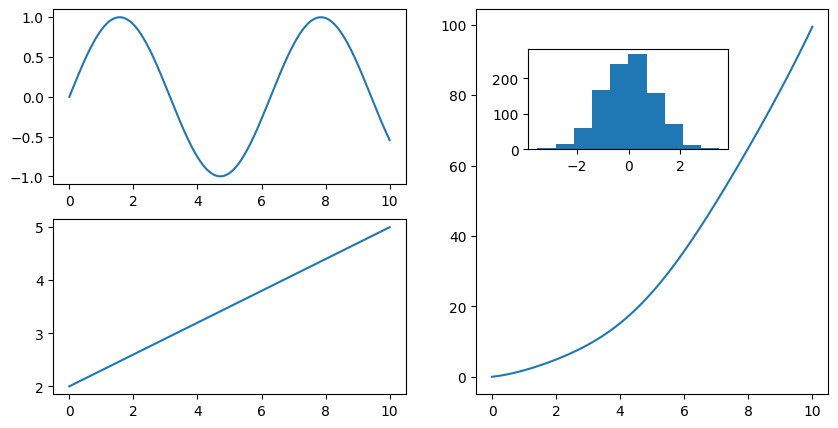

In [37]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(time, score)

ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
ax3.hist(distribution)

plt.show()

And here is a schematic of how we will approach the issue of subplot organization:

<img src="images/image4_plotOrganizationExplantion.png" width=600 height=600 />
Fig. Schematic of subplot organization elements

If that piqued your interest or if you are back to review what you read before, welcome to the comprehensive beginner tutorial on organizing your plots in Python using matplotlib!

The way we will approach the issue of organization is by clarifying the distinction between figures, subplots and axes, and how we can optimize it with matplotlib’s gridSpec. Without further ado, let’s start with the first and most basic one.

### Figure — Your Frame

The most basic element of a matplotlib plot is the figure. The figure object should be considered as your frame. Imagine any visualization as a potential collage of graphs and the figure as the place where all those graphs are pasted and moved around.

Just like a picture frame though, the figure by itself is an empty structure waiting for content. This is the first element of our initial schematic:
<img src="images/image4_FigureOrFrameExplaining.png" width=600 height=600 />
Schematic — Figure

In *matplotlib*, we create the figure object when using the line *fig = plt.figure()*. We can also omit to put `fig `= . This is simply so we store the figure object in some variable in case we needed to use it later. For example, if you wanted to save the figure as an image with `fig.save()`. If you were to save the newly created figure, you’ll see your beautiful newly created blank image.

In [38]:
fig = plt.figure()
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [39]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

If all you wanted was to plot a single graph, then you wouldn’t need to think about axes or subplots. You could simply do it like this:

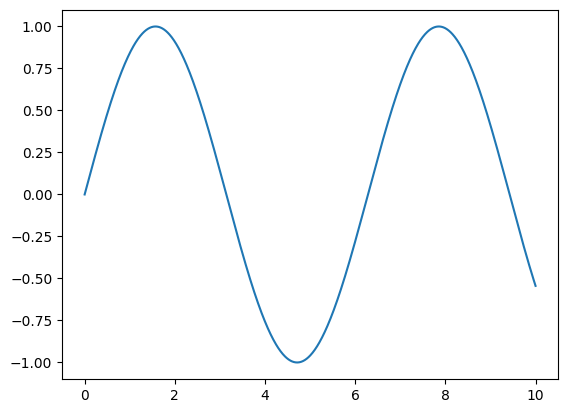

In [40]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)

# Plotting on a figure
fig = plt.figure()
plt.plot(time, height)
fig.savefig('images/junkMadeByCode.png')
plt.show()

We can deconstruct the previous block of code:
* `plt.figure()` creates a figure object
* `plt.plot(time, height)` will take the available space and draw the relationship between time (x-axis) and height (y-axis)
* `plt.show()` will simply render the plot. This is not necessary in notebooks, but it is good practice in case you are coding on a text editor or a less interactive editor than the one we use here.

If you had more data, you could add more lines to this simple plot. But what if we wanted to plot a second variable, on a different plot? That’s where the axes and subplots become useful.

### Axes — The plotting canvas

**While the figure object was your plotting frame, the canvas on which you will be drawing is the axes object. By themselves, axes are free-floating,** meaning that they can be put in any position on the figure. We can add them to our orignal schematic:

<img src="images/image4_axesExplaining.png" width=600 height=600 />
Schematic — Axes

In code, this is simply done like this:


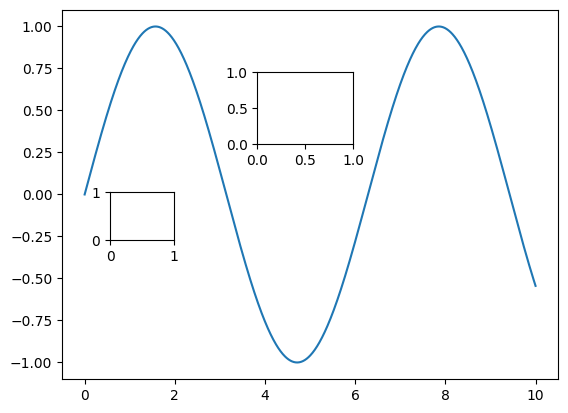

In [41]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# Adding new empty axes
fig.add_axes([0.43, 0.6, 0.15, 0.15])  #[lowerCorner_x, lowerCorner_y, width, height]
fig.add_axes([0.2, 0.4, 0.1, 0.1])     #[lowerCorner_x, lowerCorner_y, width, height]

fig.savefig('images/figureAxes')
plt.show()

Here we see that the `add_axes([left, bottom, width, height])` function added two new plotting areas onto the original plot. The specific position and size of the new axes are specified in the respective input arrays of the functions.

However, adding empty axes doesn’t serve much purpose, so let’s see how to use them to plot:

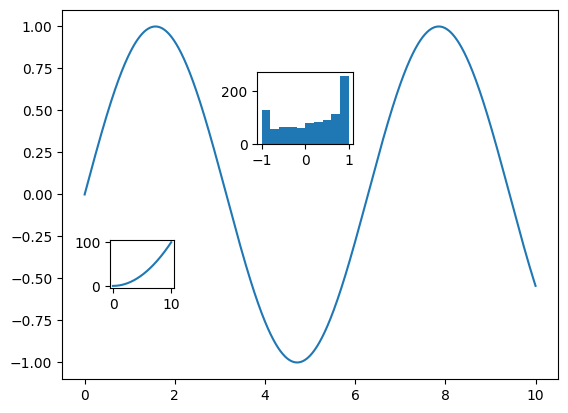

In [42]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# First new axes
ax1 = fig.add_axes([0.43, 0.6, 0.15, 0.15])
ax1.hist(height)

# Second new axes
ax2 = fig.add_axes([0.2, 0.3, 0.1, 0.1])
ax2.plot(time, time**2)

fig.savefig('images/figureAxes2.png')
plt.show()

In this example, we see that `add_axes()` actually gives or returns the actual axes object onto which we can plot, which we stored in the variables ax1 and ax2. We can then use these variables to plot different meaningful data that add value to our plot similarly to how we did it before.

In this case, we added a histogram of the height values and we plotted the square of time (which is not very meaningful information other than to show how to plot on axes).

### Subplots — Organize multiple axes

The distinction between subplots and axes is not particularly clear when one first learns to plot with matplotlib. That is because, normally, subplots are introduced before introducing axes. As you’ll see now, that tiny detail can change your whole perception of how one organizes their visualization.

In a nutshell, subplots are simply a way to organize your free floating axes into a rigid grid. You can imagine that subplots creates a table, and each individual cell of the table is a new axes for you to fill with data. Just like in this new take on the original schematic:

<img src="images/image4_subplotExplaining.png" width=600 height=600 />
Schematic — Subplots

This is how one can use subplots:

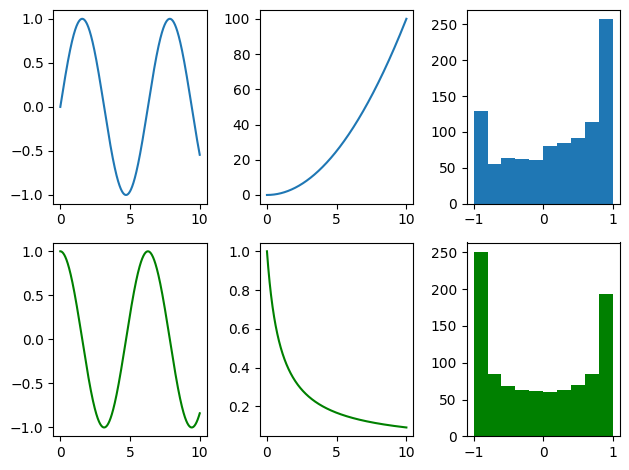

In [43]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)

# Plotting all the subplots
fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(time, height)
axes[0, 1].plot(time, time**2)
axes[0, 2].hist(height)
axes[1, 0].plot(time, weight, color='green')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')
plt.tight_layout() #kp: With this, overlaying labels on adjacent subplots were avoided
fig.savefig('images/figureAxesSubplots.png')
plt.show()

Again, let’s take it one line at at time:
* `plt.subplots()`, created a grid (2 rows and 3 columns). The function returned the figure object (stored in fig) that will hold all the subplots, as well as all the individual axes (stored in axes).
* The axes are contained on a `2D numpy array (a matrix or table if you prefer)` and can be accessed individually by their position. For example, the top-left axes with `axes[0, 0]`. If we had tons of plots to make, here we could iterate through these positions to plot them individually.
* `plt.tight_layout()` is normally used when using `plt.subplots()` to make sure the axis ticks and labels don’t overlap across subplots. Feel free to remove it to see what this means.

I highly recommend looking at the official documentation for further customization of the subplot grid, such as spacing between rows/columns or whether axis are shared.

So we know how to plot multiple graphs either at specific, free floating locations and under a well structured grid. **What else is there to do in terms of organization then? Well, what if we wanted to put emphasis on one plot by making it twice as big as another one? What if we wanted to create some type of tiled gallery of plots? This is where GridSpec becomes useful.**
### GridSpec — A Flexible Organization

**The way GridSpec works is that, as with subplots, one defines a grid. However, instead of automatically associating an axes to each cell of the grid, one can select how many cells each individual plotting area will occupy.** So if we wanted a plot to occupy twice the area of another plot, we could associate it to twice the number of cells in the grid.

Let’s see this in code:

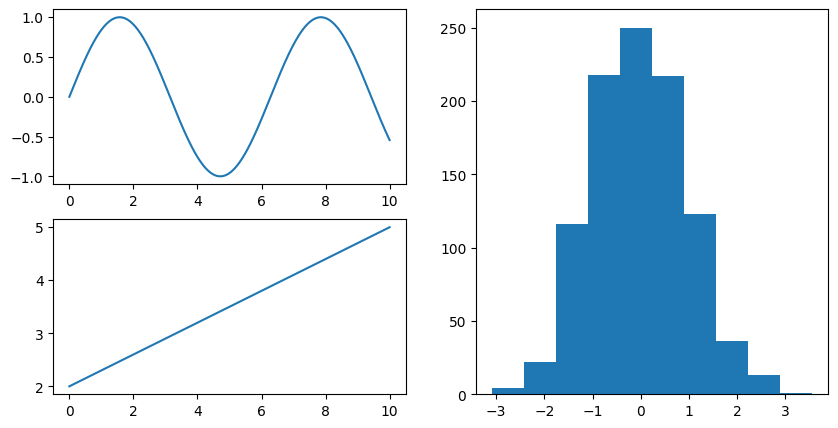

In [45]:
# A new set of data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
distribution = np.random.normal(0, 1, len(time))

# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)
#fig.savefig('images/gridspec.png')
plt.show()

* We first create the (2 by 2) grid with `gs = gridspec.GridSpec(nrows=2, ncols=2)`.
* `fig.add_subplot(gs[0, 0])` will take a subset of these cells by accessing them by index [0, 0] in this case.
* This subset can include multiple cells of our gridSpec grid, simply by accessing more than one cell as with `ax2 = fig.add_subplot(gs[:, 1])` which selects for all rows and the second column.

We can further customize our plots by setting each row or column’s size. Meaning that some rows could be narrower or wider than others. For example:

<Figure size 1000x500 with 0 Axes>

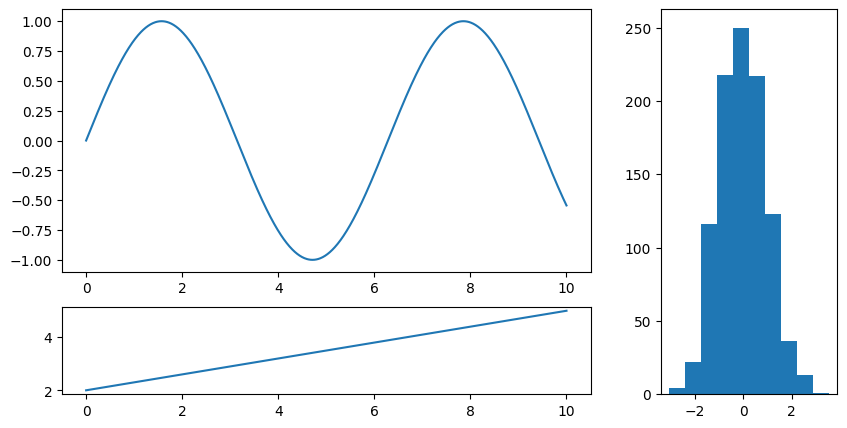

In [49]:
# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
#gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[3, 1], height_ratios=[3, 1])
gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 1], height_ratios=[3, 1])


# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)
plt.show()

And with this, we can finally get to our original schematic:

<img src="images/image4_GridSpecExplaining.png" width=600 height=600 />
Schematic of subplot organization elements:

From all we learned up to here, we can fully deconstruct the schematic: what we see here is that we applied a gridspec on a grid that is (5, 5), but with some rows being smaller than others. Then we added on subplot covering the whole first row, a subplot covering about half the third row, two subplots for the last row and 1 subplot covering the last column and last three rows. On top of this last subplot, we added two free floating axes.

As before, I highly recommend looking at the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) for further gridSpec customization, such as spacing between rows/columns or how to create nested gridSpecs.

And with that, hopefully now you know how you can structure your plots using figures, axes, subplots and GridSpec. If you have any questions or comments, please leave a comment below.

[GoTop](#GoTop) <a id='Creating_custom_plotting_functions_with_matplotlib'></a>
### Creating custom plotting functions with matplotlib

Ref: https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1 A short tutorial to learn how to create modular functions that involve plotting with matplotlib    - Matias Calderini   Apr 27, 2020·11 min read

TLDR: Define your own functions that involve plotting onto a specific axes with the following syntax:

```py
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)
    
def multiple_custom_plots(x, y, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) #example plot1
    ax.scatter(x, y, **sct_kwargs) #example plot2
    return(ax)
```
You can find the original code repository at [this link](https://github.com/maticalderini/tutorial_matplotlibCustomPlots).
### Intro

In a [previous post](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801) (kp: see [above section](#Plot_Organization_in_matplotlib)), I showed you how to better organize your figures. We saw how you could neatly display your different plots using subplots, how to add free-floating axes and how to easily create a tiled organization of your axes with GridSpec.

Because the focus of that post was the general structure and presentation of the overall figure, the plots themselves were quite simple in that they were only using one pre-defined matplotlib function such as `.plot` or `.hist` with the default parameters. Often times though, within the nice tiled structure that you learned in the previous post, you will need to draw a specific plot of your own that combines information from different types of basic plotting functions along with calls to some other data-generating or data-processing function. For example, plotting the distribution of random samples with its corresponding theoretical density function on top.

Here, I will show you how to create your own custom plotting functions that can be easily used by calling them within your organized plots with something like the following:

```py
fig, axes = plt.subplots(number_of_subplots)
for ax in axes:
    my_custom_plotting_function(ax=ax, function_kwargs)
```

<img src="images/image4_CustomFuncExplaining.png" width=600 height=600 />

Together with a nice organization of the subplots, this will help you maximize your static plotting on matplotlib (foreshadowing a dynamics plots follow-up tutorial …. maybe…) and leverage information from different plots to share a comprehensive story of your data.

### Basic syntax
#### Passing the axes

The first step in being able to have a series of custom plots within your figure is being able to connect an individual custom plot to an individual axes. The first step then is to be able to pass the axes on which we want to plot to our custom function. This can be done simply like this:
```py
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)
```
So what did I do there? The first relevant part here is the argument ax. If you have used seaborn before, you might already know how to use this. Essentially, ax will be taking the axes object onto which you want to plot. This can be a subplot axes or a simple free floating inset axes. The idea is that the organization part of the plot would be dealt outside of this function, potentially by another function.

Why does ax default to None though? This is better answered by the lines:

if ax is None:
        ax = plt.gca()

we see that if no axes object was provided in ax, it defaults to None and triggers this if condition. In this case, since no axes was given, by default, the function would look for the last axes used in the current figure, or create one if there are none available, with the function .gca (which stands for get current axes) and use that as the axes on which to plot. At the end of the function, we also return this ax, in case we want to use it for other customizations (not needed but practical in some cases).

Let’s test this by first plotting without specifying the axes and then by providing a specific axes: